In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [4]:
movies = pd.read_csv('movies.csv', usecols=['movieId', 'title'], dtype={'movieId':'int32' , 'title':'str'})
ratings = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [5]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
movies = ratings.merge(movies)

In [8]:
movies.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
 3   title    100836 non-null  object 
dtypes: float32(1), int32(2), object(1)
memory usage: 2.7+ MB


In [10]:
movies.shape

(100836, 4)

In [11]:
movies.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [12]:

movies.isna().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [13]:
movies.shape

(100836, 4)

# Tracer des histogrammes

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

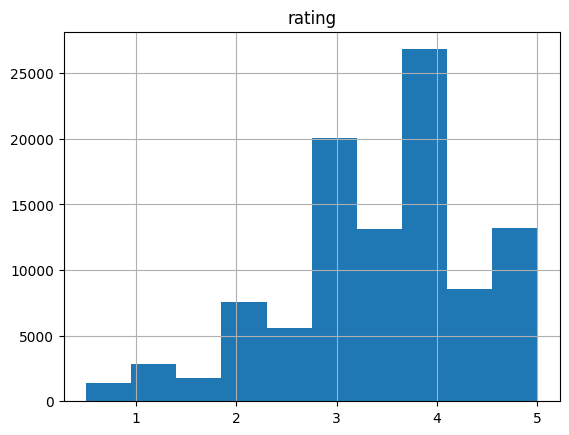

In [14]:
#x: représenterait les différentes valeurs d'évaluations possibles (par exemple, de 1 à 5 étoiles)
#y:représenterait le nombre de films ayant reçu chaque évaluation.

movies.hist('rating',bins = 10)

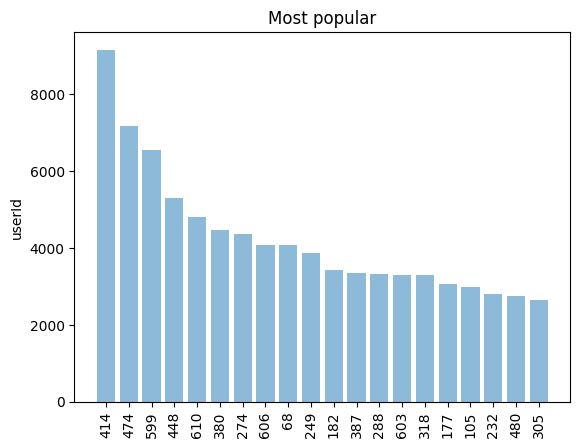

In [15]:
#x: userId
#y: la somme des évaluations (ratings) attribuées par chaque utilisateur.

popular = movies[['userId','rating']].groupby('userId').sum().reset_index()
popular_20 = popular.sort_values('rating', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
objects = (list(popular_20['userId']))
y_pos = np.arange(len(objects))
performance = list(popular_20['rating'])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userId')
plt.title('Most popular')
plt.show()


In [16]:
movies.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
431      20
194      20
257      20
207      20
189      20
Name: userId, Length: 610, dtype: int64

In [17]:
print('Number of unique users:', len(movies['userId'].unique()))

Number of unique users: 610


In [18]:
print('Number of unique movies:', len(movies['movieId'].unique()))

Number of unique movies: 9724


In [19]:
print('Unique Ratings:', movies['rating'].unique())

Unique Ratings: [4.  4.5 2.5 3.5 3.  5.  0.5 2.  1.5 1. ]


In [20]:
min_ratings1 = movies[(movies['rating'] < 2.0)]
print('Number of unique movies rated low:',len(min_ratings1['movieId'].unique()))

Number of unique movies rated low: 3025


In [21]:
med_ratings1 = movies[(movies['rating'] > 2.0) & (movies['rating'] < 4.0)]
print('Number of unique movies rated medium:',len(med_ratings1['movieId'].unique()))

Number of unique movies rated medium: 6971


In [22]:
max_ratings1 = movies[movies['rating'] >= 4.0]
print('Number of unique movies rated high:',len(max_ratings1['movieId'].unique()))

Number of unique movies rated high: 6298


In [23]:
avg_rating_movie = movies.groupby('movieId').sum() / movies.groupby('movieId').count()
avg_rating_movie.drop('userId', axis=1,inplace =True)
print ('Top 10 highly rated movies\n',avg_rating_movie.nlargest(10,'rating'))

Top 10 highly rated movies
          rating  title
movieId               
53          5.0    NaN
99          5.0    NaN
148         5.0    NaN
467         5.0    NaN
495         5.0    NaN
496         5.0    NaN
626         5.0    NaN
633         5.0    NaN
876         5.0    NaN
1140        5.0    NaN


# Prendre un sous-ensemble du dataframe


In [24]:
userId = movies.groupby('userId').count()
top_user = userId[userId['rating'] >= 50].index
topuser_ratings_df = movies[movies['userId'].isin(top_user)]
topuser_ratings_df.shape

(93812, 4)

In [25]:
topuser_ratings_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
5,18,1,3.5,Toy Story (1995)


In [26]:
topuser_ratings_df.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating,title
70016,244,1233,5.0,"Boot, Das (Boat, The) (1981)"
75406,64,3362,5.0,Dog Day Afternoon (1975)
75537,39,3019,5.0,Drugstore Cowboy (1989)
75535,39,2342,5.0,Hard Core Logo (1996)
14890,380,3033,5.0,Spaceballs (1987)


# Garder les données uniquement pour les films qui ont 50 évaluations ou plus

In [27]:
movieId = movies.groupby('movieId').count()
top_movie = movieId[movieId['rating'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['movieId'].isin(top_movie)]
top_ratings_df.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating,title
42608,119,72998,5.0,Avatar (2009)
6658,76,1136,5.0,Monty Python and the Holy Grail (1975)
49256,603,1252,5.0,Chinatown (1974)
6767,580,1136,5.0,Monty Python and the Holy Grail (1975)
14631,135,2987,5.0,Who Framed Roger Rabbit? (1988)


In [28]:
top_ratings_df.shape

(37117, 4)

#  Diviser les données aléatoirement en dataset d'entraînement et de test. (par exemple, le diviser en un rapport 70/30)

In [29]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [30]:
train_data.head()

,userId,movieId,rating,title
23112,280,2762,4.5,"Sixth Sense, The (1999)"
17343,177,71535,5.0,Zombieland (2009)
45318,217,172,3.0,Johnny Mnemonic (1995)
53751,599,6378,2.5,"Italian Job, The (2003)"
1349,534,223,4.0,Clerks (1994)


In [31]:
test_data.head()

,userId,movieId,rating,title
34375,318,1682,4.5,"Truman Show, The (1998)"
37067,123,5952,3.5,"Lord of the Rings: The Two Towers, The (2002)"
1849,57,296,3.0,Pulp Fiction (1994)
12048,413,2353,5.0,Enemy of the State (1998)
22681,339,2324,5.0,Life Is Beautiful (La Vita è bella) (1997)


# Construire un modèle de recommandation de popularité

In [32]:
train_data_grouped = train_data.groupby('movieId').mean().reset_index()
train_data_grouped.head()

,movieId,userId,rating
0,1,301.624000,3.936000
1,2,345.240000,3.440000
2,3,254.333333,3.166667
3,6,331.777778,3.880952
4,7,283.333333,2.937500


In [33]:
train_data_sort = train_data_grouped.sort_values(['rating', 'movieId'], ascending=False)
train_data_sort.head()

,movieId,userId,rating
53,318,297.269461,4.374251
241,2329,294.615385,4.301282
118,858,300.826087,4.300000
166,1252,305.756757,4.297297
171,1276,239.882353,4.294117


In [34]:
train_data.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

movieId
356     181
296     168
318     167
593     160
2571    156
260     151
480     137
110     130
2959    130
1198    126
Name: rating, dtype: int64

In [35]:
ratings_mean_count = pd.DataFrame(train_data.groupby('movieId')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('movieId')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
movieId,,
1,3.936000,125
2,3.440000,75
3,3.166667,30
6,3.880952,63
7,2.937500,24


In [36]:
pred_df = test_data[['userId', 'movieId', 'rating']]
pred_df.rename(columns = {'rating' : 'true_ratings'}, inplace=True)
pred_df = pred_df.merge(train_data_sort, left_on='movieId', right_on = 'movieId')
pred_df.head(3)

,userId_x,movieId,true_ratings,userId_y,rating
0,318,1682,4.5,296.116883,3.798701
1,484,1682,4.0,296.116883,3.798701
2,608,1682,4.5,296.116883,3.798701


In [37]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163693 sha256=528fa235e2bb2d04f3527475e50f601a10d0fe9c8ac1686ba516e60728dbc524
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [38]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy


In [39]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [40]:
pred_df.rename(columns = {'rating' : 'predicted_ratings'}, inplace = True)

In [41]:
pred_df.head()

,userId_x,movieId,true_ratings,userId_y,predicted_ratings
0,318,1682,4.5,296.116883,3.798701
1,484,1682,4.0,296.116883,3.798701
2,608,1682,4.5,296.116883,3.798701
3,339,1682,4.5,296.116883,3.798701
4,483,1682,3.5,296.116883,3.798701


In [42]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 0.9247960510172893


In [43]:
reader = Reader(rating_scale=(0.5, 5.0))

In [44]:
data = Dataset.load_from_df(top_ratings_df[['userId', 'movieId', 'rating']],reader)

In [45]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [46]:
type(trainset)

surprise.trainset.Trainset

# Entraînement du modèle


In [47]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Le modèle KNNWithMeans est maintenant prêt à être utilisé pour faire des prédictions de recommandation de films basées sur le filtrage collaboratif.

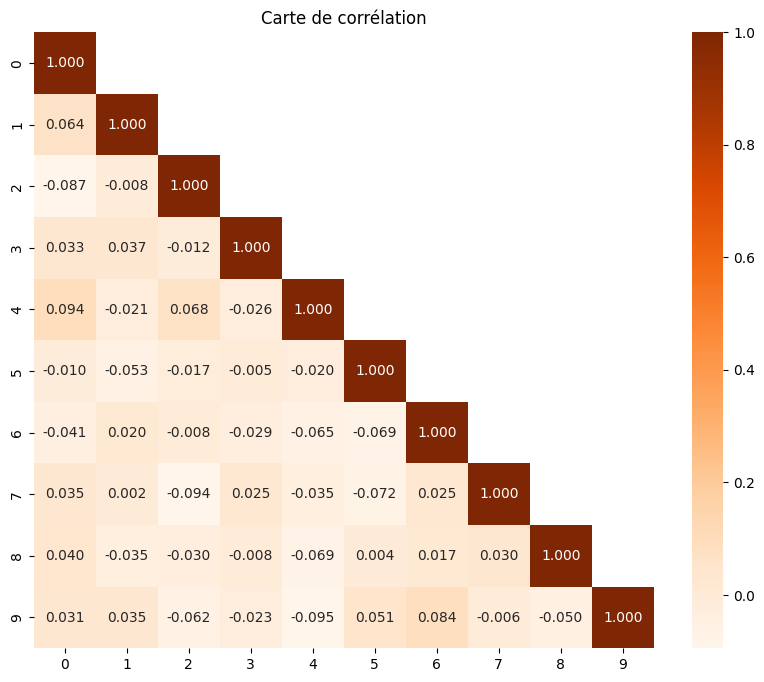

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sim_matrix = algo_user.sim
num_users_to_visualize = 10
user_indices_to_visualize = np.array(trainset.all_users())[:num_users_to_visualize]
sim_matrix_subset = sim_matrix[:num_users_to_visualize, :num_users_to_visualize]
for i in range(num_users_to_visualize):
    for j in range(i + 1, num_users_to_visualize):
        sim_matrix_subset[i, j] = np.nan

# Visualisation de la matrice de similarité sans la diagonale supérieure
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix_subset, annot=True, fmt=".3f", cmap = "Oranges", xticklabels=user_indices_to_visualize, yticklabels=user_indices_to_visualize)
plt.title("Carte de corrélation")
plt.show()


#SVD

In [49]:
svd_model = SVD(n_factors=15,reg_all=0.02)
svd_model.fit(trainset)

Une fois entraîné, le modèle est capable de faire des prédictions pour les notations manquantes et générer des recommandations personnalisées pour les utilisateurs.

# Évaluer les deux modèles.


### Modèle de recommandation de popularité (RMSE)

In [50]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 0.9247960510172893


### Modèle de recommandation de filtrage collaboratif(RMSE)

In [51]:
print(len(testset))
type(testset)

11136


list

### KNNWithMeans

In [52]:
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid=91, iid=2987, r_ui=4.0, est=3.6322321459638816, details={'actual_k': 10, 'was_impossible': False})

In [53]:
accuracy.rmse(test_pred)

RMSE: 0.8349


0.834866966620496

RMSE de KNNWithMeans : 0.8349

In [54]:
test_pred = svd_model.test(testset)

In [55]:
accuracy.rmse(test_pred)

RMSE: 0.8351


0.8350953731669354

RMSE de SVD : 0.8358

### Ajustement des paramètres du système de recommandation SVD

In [56]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [57]:
gs.fit(data)

In [58]:
gs.best_params

{'rmse': {'n_factors': 10, 'reg_all': 0.02}}

In [59]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.7856


0.7856400595369347

La valeur RMSE pour le modèle de filtrage collaboratif, byKNNWithMeans est de 0.8349 et SVD est de 0.8349. Après l'ajustement des paramètres de SVD, il est de 0.7753

# Obtenez les meilleures recommandations -K(K=5). Puisque notre objectif est de recommander de nouveaux films à chaque utilisateur en fonction de ses préférences, nous recommanderons 5 nouveaux films.

In [60]:
from collections import defaultdict
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [61]:
top_n = get_top_n(test_pred, n=5)

In [62]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

91 [318, 1136, 912, 904, 4993]
573 [2959, 1213, 1148, 1193, 1136]
434 [750, 58559, 593, 7361, 6016]
460 [4993, 48516, 2571, 34405, 44191]
288 [1198, 1136, 912, 1206, 296]
597 [904, 260, 1288, 1387, 1246]
416 [260, 1196, 608, 1199, 4995]
391 [1197, 1221, 1148, 1247, 356]
608 [50, 1196, 858, 296, 4993]
432 [48516, 1206, 58559, 4995, 1240]
428 [2959, 2329, 2858, 2571, 541]
307 [1197, 904, 4226, 6016, 1288]
83 [4973, 58559, 2324, 1222, 7153]
177 [1258, 1288, 47, 2502, 1225]
586 [318, 1198, 1210, 858, 1291]
489 [4973, 4993, 5618, 1201, 111]
309 [318, 1213, 296, 1203, 5952]
411 [1, 223, 161, 597, 353]
387 [912, 1199, 6016, 858, 1136]
339 [318, 750, 7153, 1193, 908]
558 [593, 2028, 1259, 4306, 223]
510 [750, 593, 527, 1258, 1225]
584 [593, 1, 457, 110, 34]
464 [1196, 4226, 48516, 58559, 858]
466 [58559, 356, 260, 46578, 2571]
63 [296, 1089, 2959, 356, 4226]
599 [318, 2959, 1148, 260, 58559]
346 [912, 1193, 4973, 2997, 1252]
514 [356, 1193, 2571, 74458, 1704]
322 [858, 1199, 2502, 4011, 46578]